### Contributors:
- Mikhail Stepanov (mikhail.stepanov@uni-potsdam.de)
- Burak Kurucu (burak.kurucu@uni-potsdam.de)
- Md Shafayet Hossen Chowdhury (md.shafayet.hossen.chowdhury@uni-potsdam.de)
- Mohammad Yakub (mohammad.yakub@uni-potsdam.de)

**Sheet 5. Exercise 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [2]:
#load the data
x = pd.read_csv("X.txt", header = None) 
y = pd.read_csv("Y.txt", header = None)

In [3]:
#We have 201 three dimensional samples 
x.shape

(201, 3)

In [4]:
# length of y is 201
y

,0
0,7.2510
1,7.7268
2,7.3337
3,6.7290
4,8.1624
...,...
196,-3.2103
197,-2.2827
198,-1.8519
199,-2.3600


The idea of linear regression method is using the observations
from the previous experiment find such linear model, that fits our data in the best way, in order to predict the future values. For this purpose, we have to find the best coefficients betta for our fit. If our data matrix X has a full rank p+1 betta_hat can be found using equation 10 from the lecture 10 
(slide 11). Since our vector of coefficients betta has the length 
(p + 1), because of b_0, that is slope, we have to add a column of ones at the 
beginning of the matrix X. 

In [5]:
x = np.asarray(x)
ones  = np.ones(x.shape[0]) 

#matrix X with onces in the first column
x_ones = np.insert(x, 0, ones, axis = 1) 
y = np.asarray(y)
print("y shape", y.shape)
print("x shape", x.shape)
print("x_new shape", x_ones.shape)

y shape (201, 1)
x shape (201, 3)
x_new shape (201, 4)


In [6]:
#Verify, that matrix X_ones has a full rank p + 1
#Yes, the matrix has a full rank and we can use the equestion from the lecture 
print(np.linalg.matrix_rank(x_ones) == x_ones.shape[-1])

True


In [7]:
#In this function we compute an estimate of betta_hat, using the equestion 
#from the lecture
def betta(x, y): 
    x_tx = np.dot(x.T, x)               # X_t*X
    x_tx_1 = np.linalg.inv(x_tx)        #(X_t*X)^-1 
    x_tx_1_x_t = np.dot(x_tx_1, x.T)    #(X_t*X)^-1 * X_t
    return np.dot(x_tx_1_x_t, y)        #betta = (X_t*X)^-1 * X_t * y

#In this function we compute an estimate of sigma square given betta square 
#using the equestion from the lecture 10 (slide 18) 
#This function not only calculates the sigma square, but also returns epsilon 
#that shows all deviations between true values y and our estimated y_hat
def sigma_sq(y, x, betta):
    n = len(y) 
    epsilon = y - np.dot(x, betta)
    return epsilon, (np.dot(epsilon.T, epsilon)/n)[0][0]

#This function computes an estimate of the adjust sigma square 
#(lecture 10, slide 23)
def sigma_sq_ad(y, x, betta):
    n = len(y)
    p = x.shape[-1] - 1
    return ((np.dot(y.T, y) - np.dot(np.dot(betta.T, x.T), y))/(n-p-1))[0][0]   

In [8]:
betta_hat = betta(x_ones, y)
print("betta_hat", betta_hat)

betta_hat [[-0.00800698]
 [ 0.88161162]
 [-2.45938171]
 [-0.97715699]]


Our betta_hat is as expected 4-dimensional, where b_0 is the slope. Since after the calculation we have gotten betta, that has correct dimensionality, we assume, that our calculation was correct.

In [9]:
eps, sig_sq = sigma_sq(y, x_ones, betta_hat)
print("sigma square", sig_sq)

sigma square 0.9548405627555105


Sigma square is the mean squared error between y and y_hat, using the best estimator for betta_hat. The smaller this value is, the better is our estimator, because the smaller the MSE is, the better our estimator fits the data. In our case we have the value that even less than one, what we find as pretty good result (MSE can take values between 0 and infinity).

In [10]:
print("sigma square adjusted", sigma_sq_ad(y, x_ones, betta_hat))

sigma square adjusted 0.974228188395214


The value of adjusted sigma square is a little bit larger then of the sigma square. But also here we have a relatively small value. 

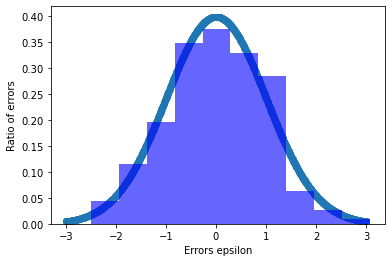

In [11]:
#In this part we wanted to look at the destribution of our errors 
#(deviatons between true y and y_hat). We excpected that our errors distributed 
#according to the normal distribution with mean of 0 and variance of 1. 
#It means, that the most of deviations between y and y_hat are near to zero and 
#since the model is not absolutely ideal we also excpect, that some of the 
#estimated vaules are more different from the true y. 
#We could conclude, that our result is pretty good and the destribution 
#of errors is indead similar to the normal distribution N(0,1), 
#as shown in the plot below.

eps = eps.reshape(1, len(eps))[0]
x_ax   = np.linspace(-3, 3, 1000)
mean = 0
var = 1
#normal distribution with 0 mean and variance of 1
plt.scatter(x_ax, norm.pdf(x_ax, mean, var))  
plt.hist(eps, density=True, alpha=0.6, color='b')
plt.xlabel("Errors epsilon")
plt.ylabel("Ratio of errors") 
plt.show()